In [55]:

#ONLY FOR INDIVIDUAL DAYS

'''
from the chosen day, choose 1 particle trajectory based on the closest point from S15
get a new set of point S for just that trajectory
plot that trajectory
find the points in S that closest to a) S15 and b)S16
Show that in the graph
'''

from traj import Traj as Traj

from scipy.spatial import distance


from pytz import timezone




import datetime as dt

import matplotlib as mat

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools



import shutil

from salishsea_tools import viz_tools

from mpl_toolkits.axes_grid1 import make_axes_locatable


from matplotlib.backends.backend_agg import FigureCanvasAgg as fc

import base



%matplotlib inline

#We have to edit:



P = 17


days = ("JUL 18",)

plots = ("jul18",)


date_0 = base.first_date

directory = base.directory

print (date_0)
    






COL = 1

delta = 1/3 #hours. we get this from ariane



length = "5 days" #multiply trajectory length by ratio

tt = 5

#reference: 14 days

ratio = 5/14

total = int(delta**(-1) * 24 * tt)

size = 40

fontsize = 50



mat.rcParams.update({'font.size': fontsize})

tfs = 55 #title font

ms = 25

s = 300












from scipy.spatial import distance


import datetime as dt



class Traj:
    def __init__(self, traject, t0, deltat = 20):
        
        self.deltat = deltat
        
        self.traj = traject
    
        self.points = [(x[1], x[2]) for x in self.traj]

        self.particles = [x[0] for x in self.traj]
        
        self.t0 = t0
        
    def closest_p(self, p2):
        
        closest_p = self.points[distance.cdist([p2], self.points).argmin()]
        
        return closest_p
    
    def find_particle (self,point):

        when = self.points.index(point)

        P = self.particles[when]
        
        return P
    
    def time (self, point):
        return self.t0 + dt.timedelta(minutes= self.deltat * self.points.index(point))
    
    def timec (self, point):
        return self.t0 + dt.timedelta(minutes= self.deltat * self.points.index(self.closest_p(point)))
    
    def sub_traj(self, particle):
        T = [i for i in self.traj if i[0] == particle]
        b= Traj(traject = T, t0 = self.t0+dt.timedelta(minutes = particle*60), deltat = self.deltat)
        return b
print (directory)

2016-01-01 00:00:00
/home/gsgarbi/analysis-giorgio/project4/2016/jan01


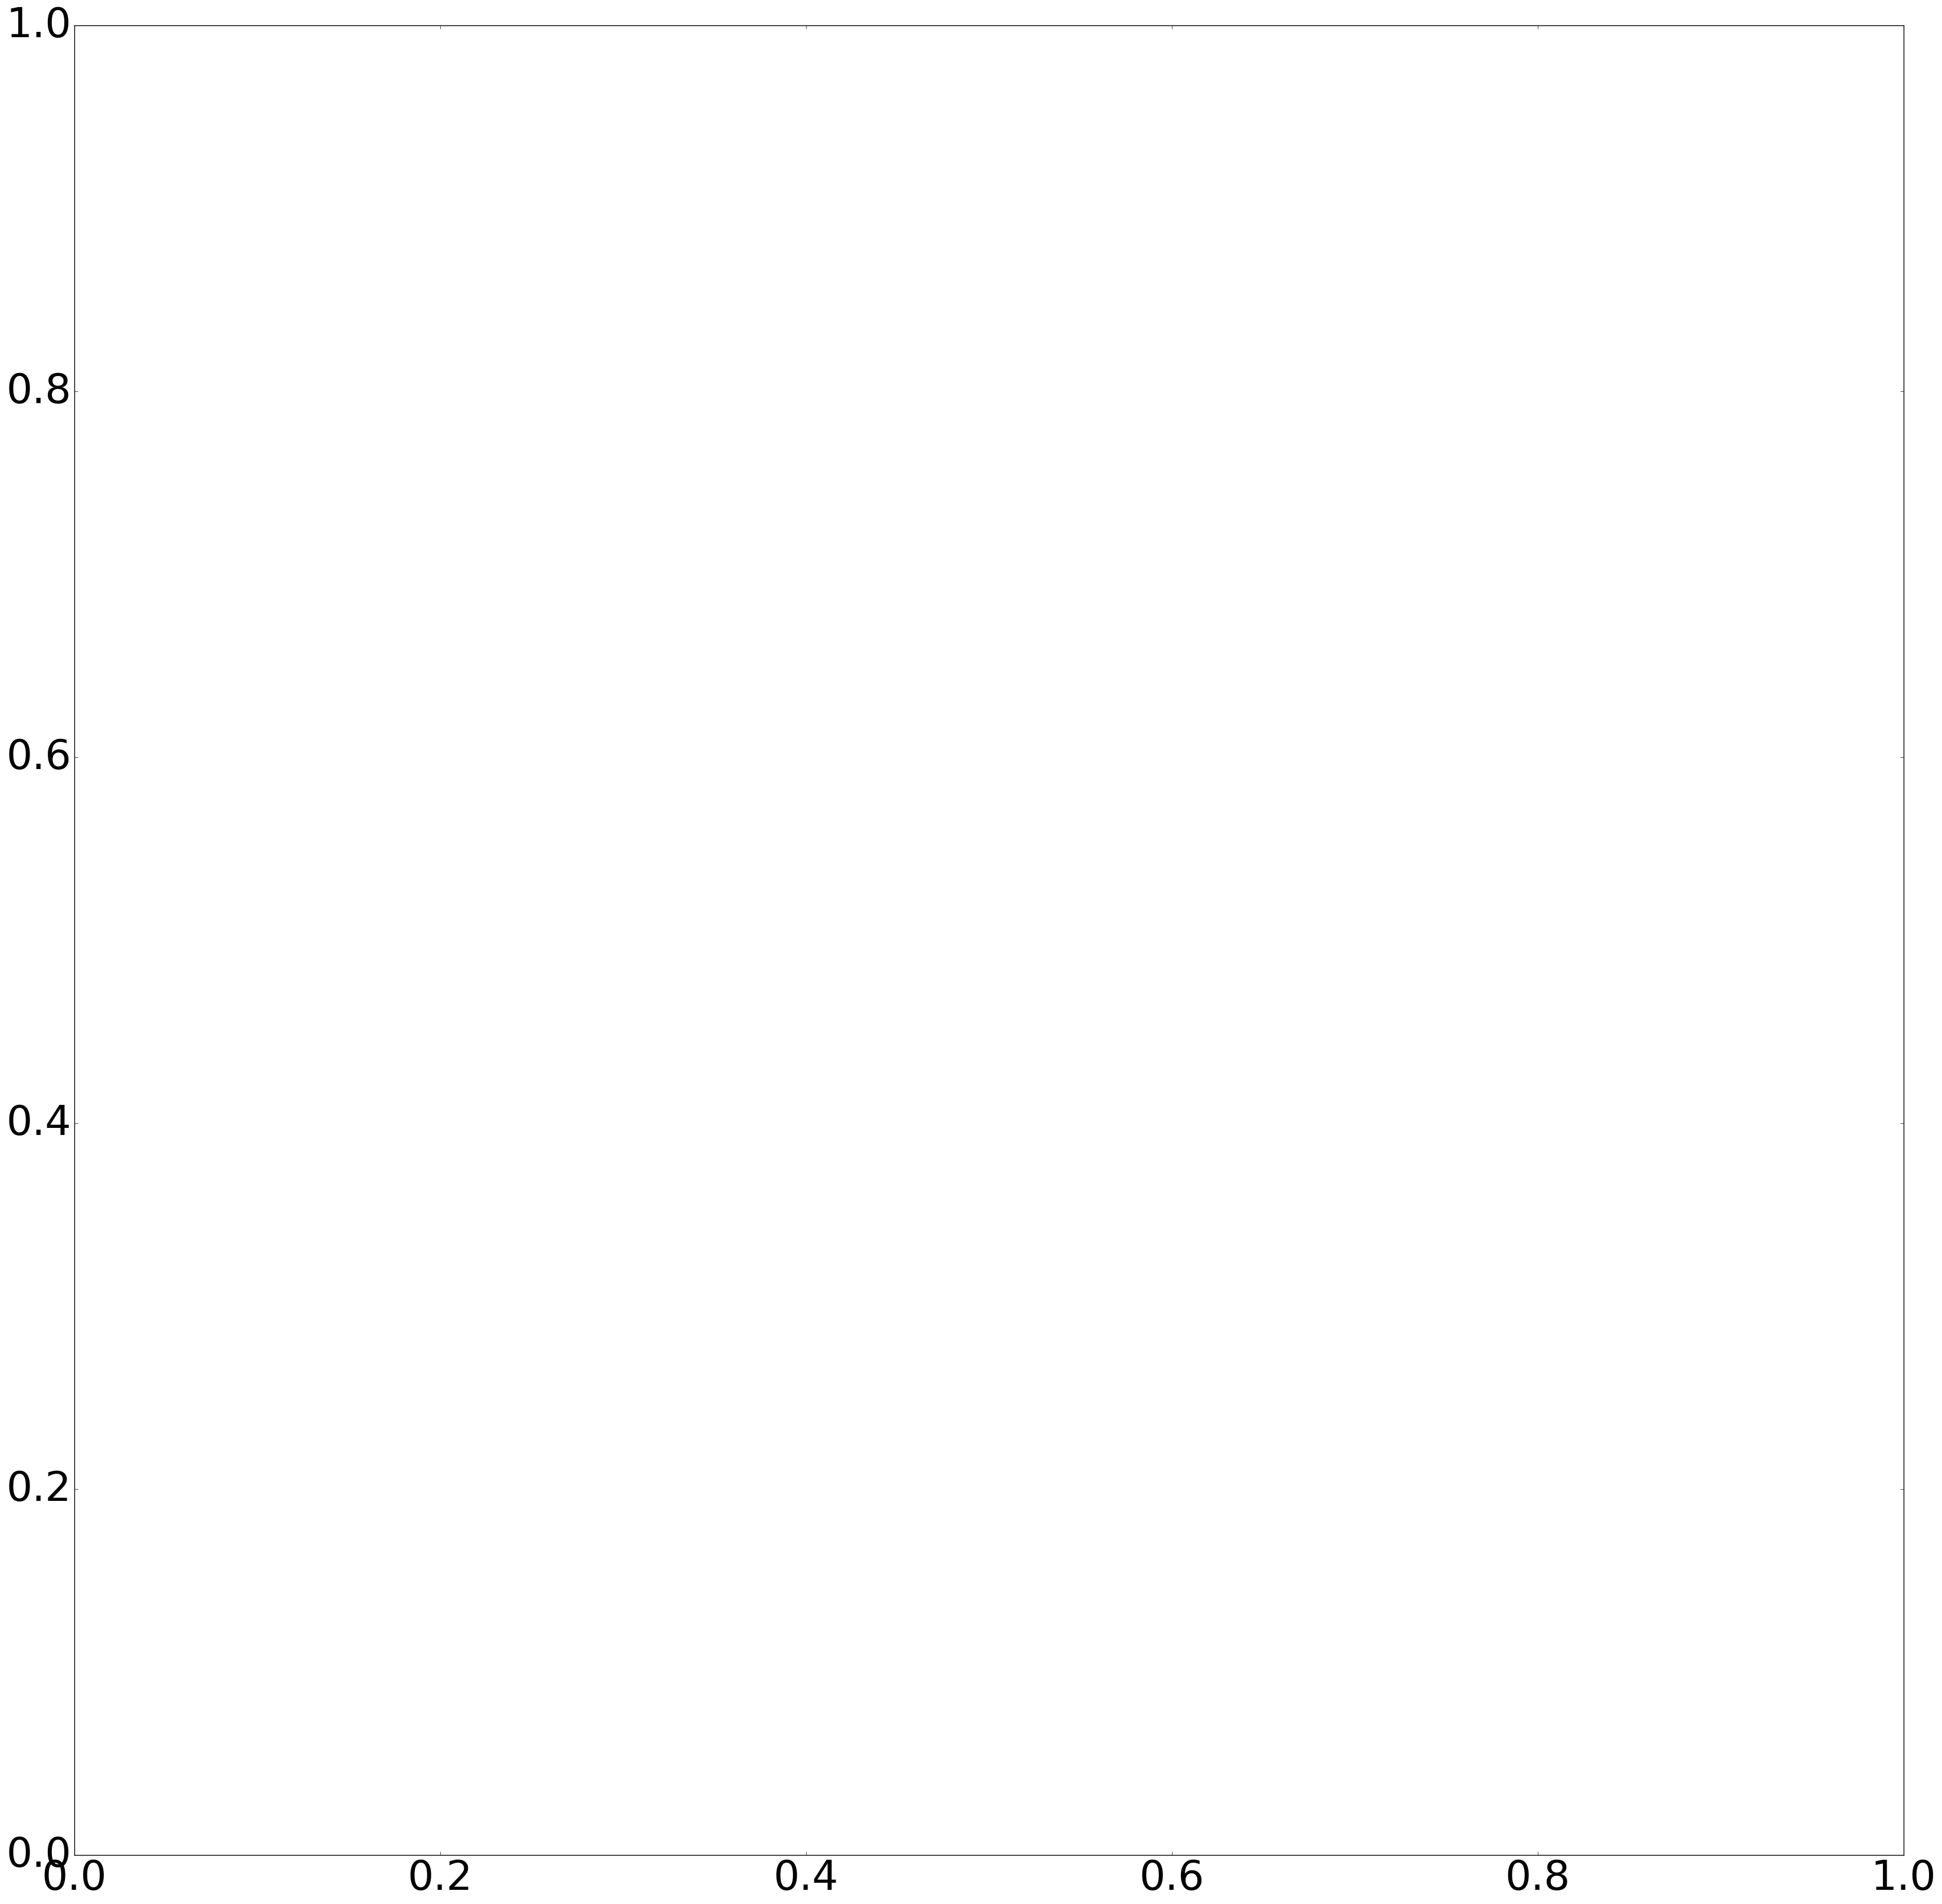

In [44]:
# fig mesh structure/constants

nplots = len(plots)

LIN = nplots // 2 + nplots % 2


fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

canvas = fc(fig)

#         Station 15: Lat = 49.130412, Lon = -123.3114
#         Station 16: Lat = 49.1214, Lon = -123.317415

S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)




bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/bathy_meter_SalishSea2.nc")
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]





#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
#print(y, x)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1

deep = 110
shallow = 35

time0 = 0

time14 = 5

new_limx = (-124.5,-122.5)

new_limy = (48.7,49.5)



original_limx = (-123.5, -123.1)

original_ticksx = (-123.5, -123.3, -123.1)

original_limy = (49.05, 49.35)

original_ticksy = (49.1, 49.2, 49.3)

new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])

new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                   

Iona =(model_lons[outy, outx], model_lats[outy, outx])



#norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
norm_p = mpl_colors.Normalize(vmin=shallow, vmax=deep)
cmap_p = plt.cm.plasma_r

norm_w = None
cmap_w = "winter_r"

norm_p = mpl_colors.Normalize(vmin=time0, vmax=time14)
cmap_p = plt.cm.plasma_r


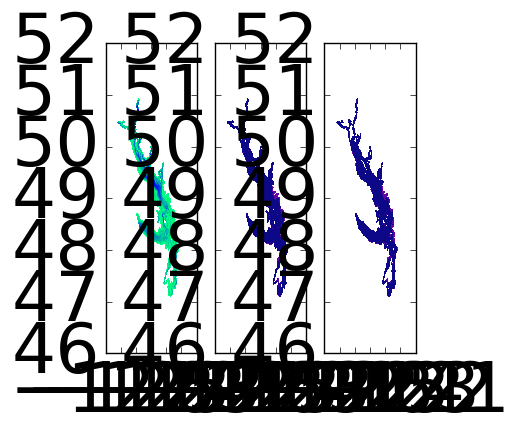

In [31]:

meshes = plt.figure(figsize=(4,4))

ax_w = meshes.add_subplot(131)

ax_p = meshes.add_subplot(132)

ax_t = meshes.add_subplot(133)




mesh_w = ax_w.pcolormesh(model_lons, model_lats, depth, cmap=cmap_w, norm = norm_w)
        
mesh_p = ax_p.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

mesh_t = ax_t.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

In [58]:
# what to plot, how many plots, how many particles, for how long?
# how many columns?
# create trajectories[], create axes parameters

j = 0
k= 0
LIN = nplots // 2 + nplots % 2

trajectories = []



initial_positions = []


trajectories1 =[]
init1 = []

def loadtraj():
    trajectories1.append(np.loadtxt(directory+"/traj.txt", delimiter = ' '))
    init1.append(np.loadtxt(directory+"/initial_positions.txt"))
    
    trajr = np.loadtxt(directory+"/traj.txt", delimiter = ' ')
    
loadtraj()

l = 0
c= COL


#index is the time


#print (points)






    
otraj = Traj(t0 = date_0, traject=trajr) 

straj = otraj.sub_traj(P)



trajp = straj.traj[:total]




print (directory)

print(trajr)

#results: PARTCLES, title                       

/home/gsgarbi/analysis-giorgio/project4/2016/jan01
[[  1.00000000e+00  -1.23308070e+02   4.91902600e+01  -4.50410500e+01
    0.00000000e+00]
 [  1.00000000e+00  -1.23308180e+02   4.91889800e+01  -4.70693000e+01
    9.90000000e-04]
 [  1.00000000e+00  -1.23308390e+02   4.91877200e+01  -4.84897300e+01
    1.98000000e-03]
 ..., 
 [  2.40000000e+01  -1.23678810e+02   4.92285600e+01  -7.63012400e+01
    9.27580000e-01]
 [  2.40000000e+01  -1.23679480e+02   4.92287500e+01  -7.58890800e+01
    9.28570000e-01]
 [  2.40000000e+01  -1.23680160e+02   4.92289400e+01  -7.54769300e+01
    9.29560000e-01]]


/home/gsgarbi/anaconda3/lib/python3.5/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/home/gsgarbi/analysis-giorgio/project4/2016/jan01/traj.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


In [59]:

titles = []

time_0 = date_0 + dt.timedelta(hours = int(P))
length = length
depth_0 = -int(trajp[0][3])

ftitle = (time_0, length, depth_0)
        
        
title = "INITIAL TIME: {} (PDT) ;  LENGTH: {} ; INITIAL DEPTHS(m): {} ".format(time_0 + dt.timedelta(hours = -8), length, depth_0)
        

print (title)


INITIAL TIME: 2016-01-01 09:00:00 (PDT) ;  LENGTH: 5 days ; INITIAL DEPTHS(m): 59 


In [60]:
# fig = plt.figure(figsize = (size, size))


# top = 0.95

# vert = 0.07

# rig = 0.1

# hei = 0.03

# wid = 1.5



# part = fig.add_axes((rig,top,wid,hei))
# norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
# cb1 = mpl_colorbar.ColorbarBase(part, cmap=cmap, norm=norm,  orientation = "horizontal")
# cb1.set_label('Particle Depth (m)', fontsize = 50)

# particlecb = fig

# fig = plt.figure(figsize = (size, size))

# water = fig.add_axes((rig,top,wid,hei))
# cb_mesh = fig.colorbar(mesh, water, orientation = "horizontal" )
# cb_mesh.set_label("Water Depth (m)", fontsize = 50)

# watercb = fig

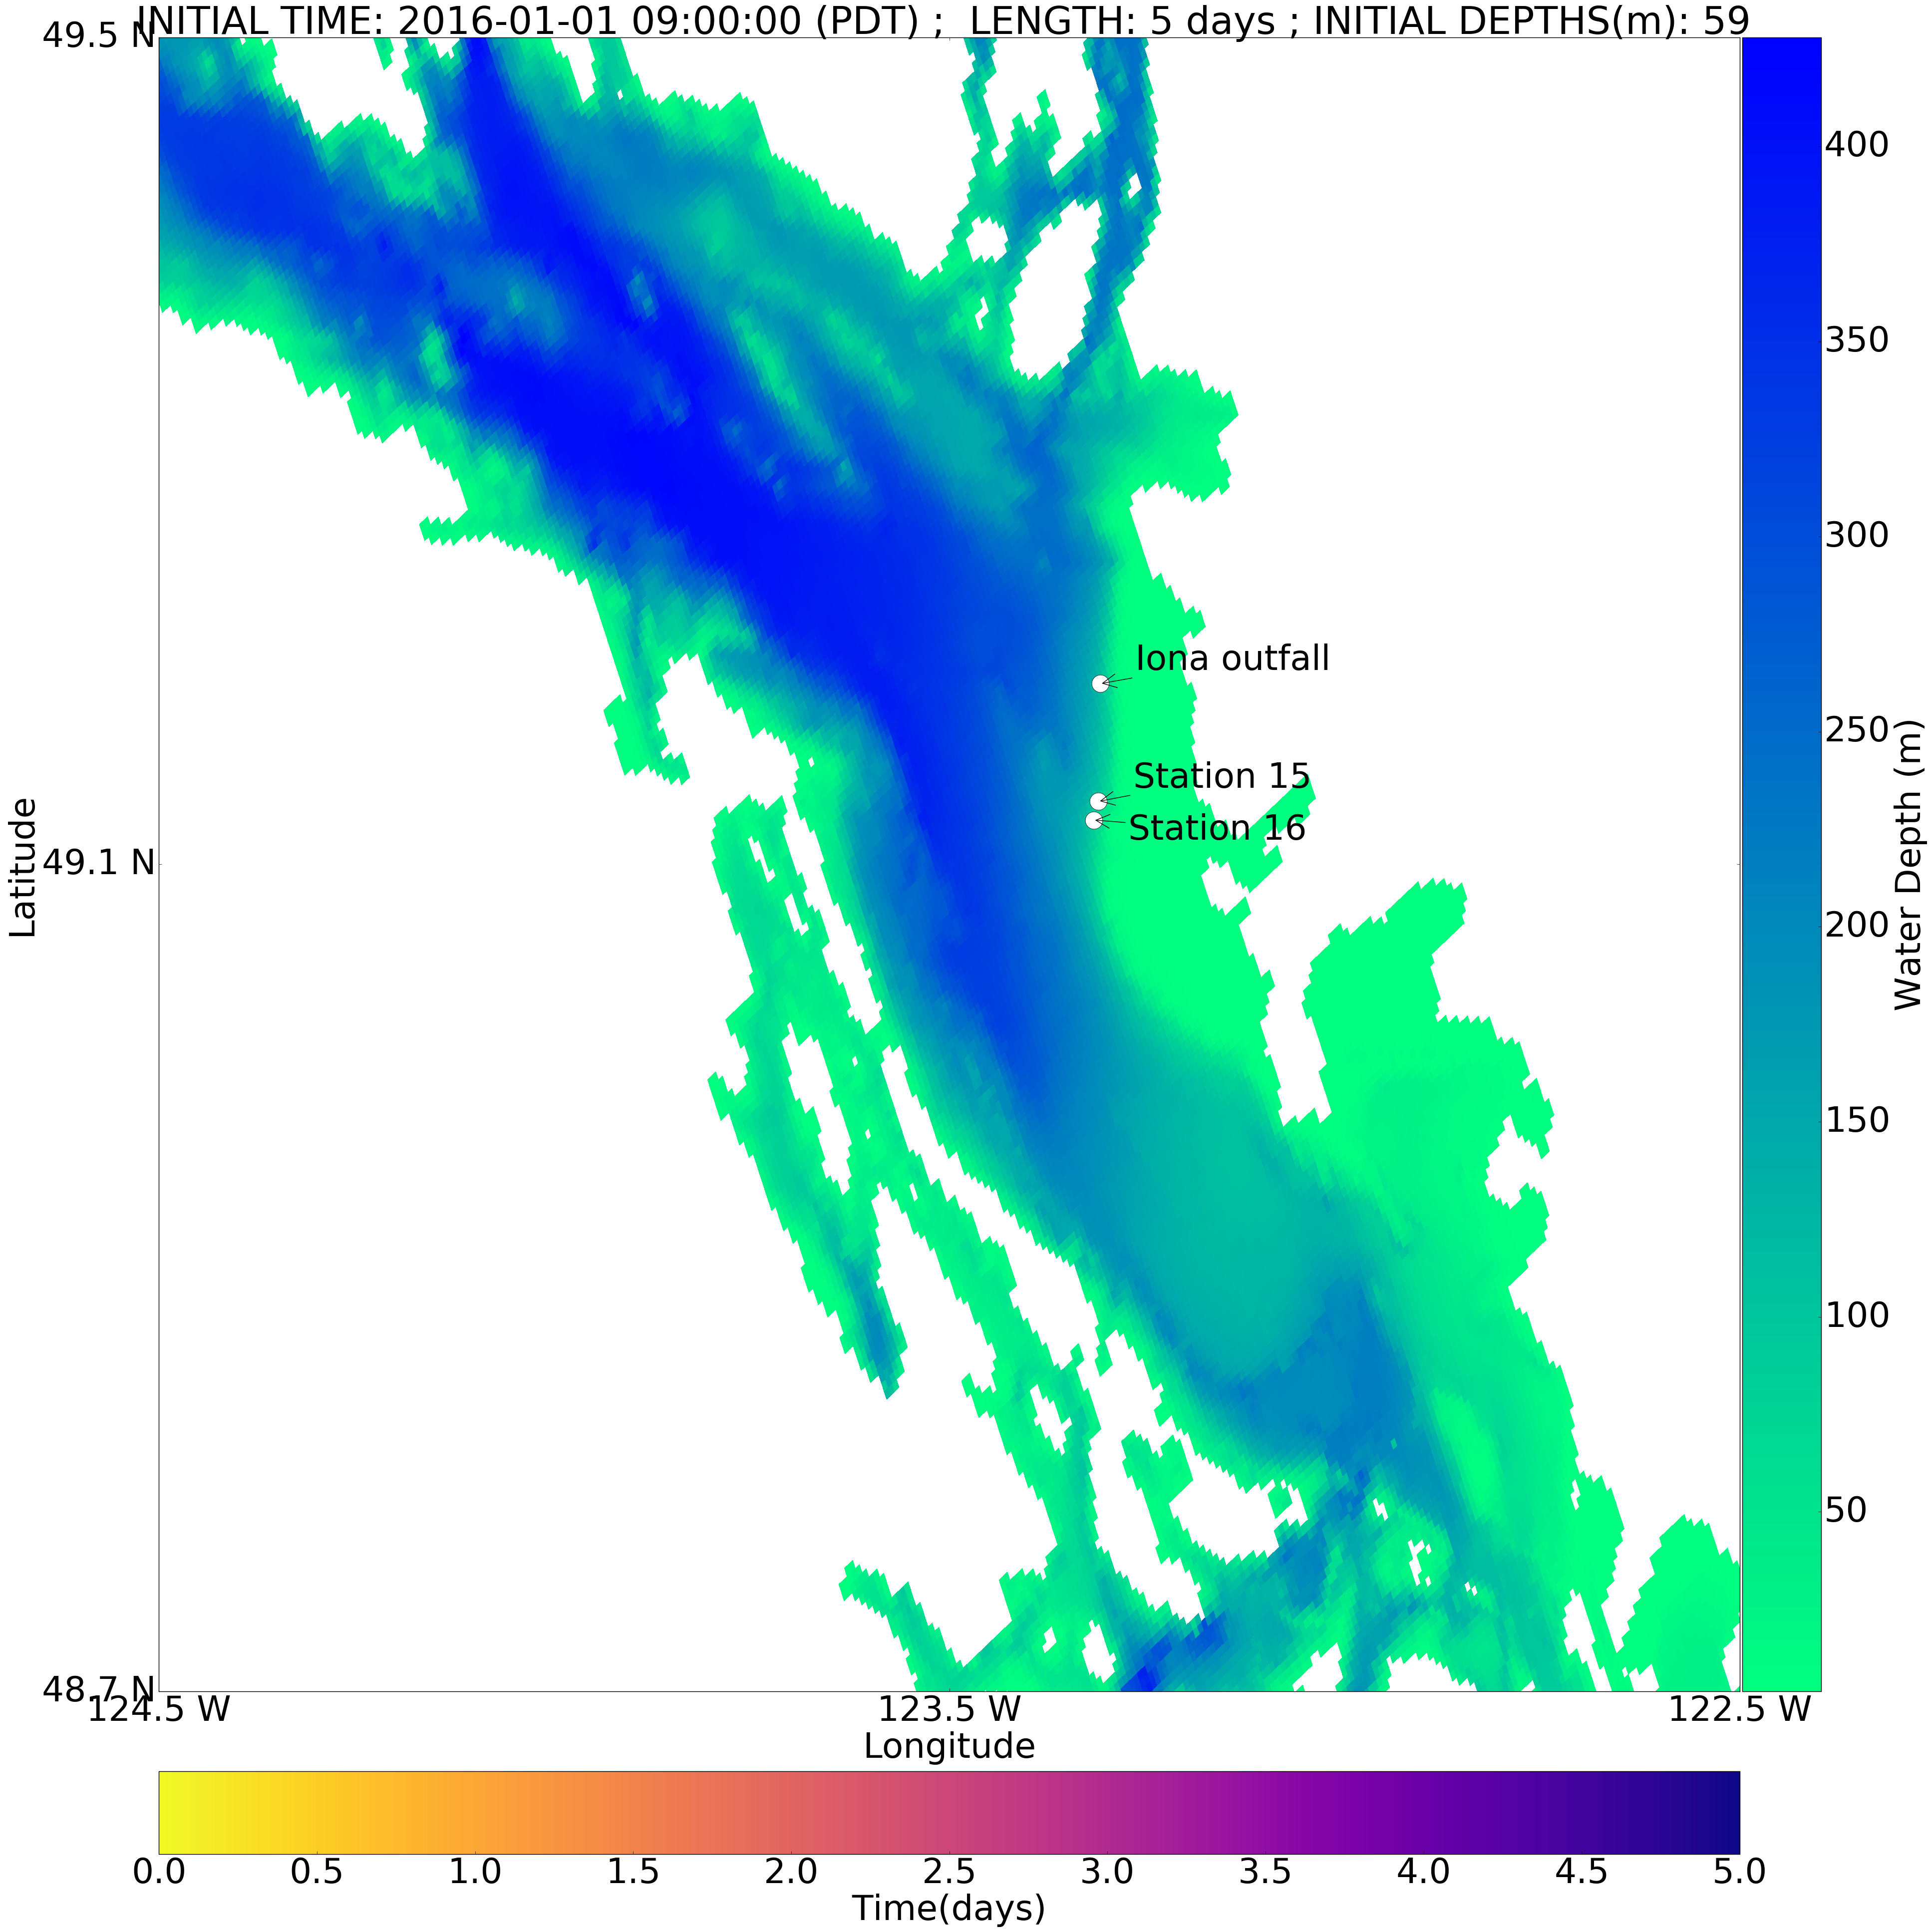

In [61]:
fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

axs=np.reshape(axs,(1,1))



for j in range(LIN):
    for k in range (COL):
        
        divider = make_axes_locatable(axs[j,k])
        
        cax_w = divider.append_axes("right", size="5%", pad=0.05)
        
        cax_p = divider.append_axes("bottom", size="5%", pad=1.6)
        
        
        cb_w = fig.colorbar(mesh_w, cax = cax_w)
        
        cb_p = fig.colorbar(mesh_p, cax = cax_p, orientation = "horizontal")
        
        cb_w.set_label("Water Depth (m)")
        
        cb_p.set_label("Time(days)")




        mesh_w = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)


        
        

        pos = COL*j+k
        
        axs[j,k].set_title(title, fontsize = tfs)

            
        
        

        

        axs[j,k].set_xlim(new_limx)
        axs[j,k].set_xticks(new_ticksx)
        axs[j,k].set_xticklabels(('%s W' %-new_limx[0], '%s W' %-round(float(sum(new_limx))/2,2), '%s W' %-new_limx[1]))
        axs[j,k].set_xlabel('Longitude')
        
        axs[j,k].set_ylim(new_limy)
        axs[j,k].set_yticks(new_ticksy)
        axs[j,k].set_yticklabels(('%s N' %new_limy[0], '%s N' %round(float(sum(new_limy))/2,1), '%s N' %new_limy[1]))
        axs[j,k].set_ylabel('Latitude')
        
        
        #Iona
        axs[j,k].plot(model_lons[outy, outx], model_lats[outy, outx], 'wo', ms = ms)
        #New Stations

        axs[j,k].plot(S15[0],S15[1], 'wo', ms = ms)
        
        axs[j,k].plot(S16[0],S16[1], 'wo', ms = ms)
        
        axs[j,k].annotate(
        "Iona outfall",
        xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        axs[j,k].annotate(
        "Station 15",
        xy=(S15[0],S15[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

        axs[j,k].annotate(
        "Station 16",
        xy=(S16[0],S16[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='top',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    


plt.tight_layout()



In [62]:
south = []
for j in range(LIN):
    for k in range(COL):
            for i in range(len(trajectories[j][k])):
                if trajectories[j][k][i][2] < 50:
                    if trajectories[j][k][i][0] not in south:
                        south.append(trajectories[j][k][i][0])

        


IndexError: list index out of range

In [ ]:
end = len(trajp)


for j in range(LIN):
    for k in range (COL):


            
        
            for t in range(len(trajp)):
                scaled_t = 1-(end - t)/ end
                cmap = plt.cm.plasma_r
                color = cmap(scaled_t)
                axs[j,k].scatter(trajp[t][1], trajp[t][2], c = color, edgecolor = "none", s =s)
                


In [ ]:
for Q in range (1,25):
    otraj = Traj(traject = trajr, t0 = date_0)




    straj = otraj.sub_traj(Q)
   

    #print ('Closest point to Iona is: ', straj.closest_p(Iona), "at time ", straj.timec(Iona) +dt.timedelta(hours = -8))

    print (Q, 'Closest point to S15 is: ', straj.closest_p(S15), "at time ", straj.timec(S15) +dt.timedelta(hours = -8))





otraj = Traj(traject = trajr, t0 = date_0)


straj = otraj.sub_traj(P)

# print ("Iona is ", Iona)

# print ("S15 is: ", S15)


# print ('Closest point to Iona is: ', straj.closest_p(Iona), "at time ", straj.timec(Iona) +dt.timedelta(hours = -8))

# print ('Closest point to S15 is: ', straj.closest_p(S15), "at time ", straj.timec(S15) +dt.timedelta(hours = -8))




xy=(-124.49,48.71)

axs[j,k].annotate(
            "closest point to S15 on {} (PDT) \n".format(straj.timec(S15) + dt.timedelta(hours = -8)) +
            "closest point to S16 on {} (PDT)".format(straj.timec(S16) + dt.timedelta(hours = -8)),
            xy=xy, xytext=(50, 10),
            textcoords='offset points')

In [ ]:


fig

In [41]:
fig.savefig("/home/gsgarbi/analysis-giorgio/results" + "/plots.png")